In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/customer-shopping-latest-trends-dataset/shopping_trends.csv


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/customer-shopping-latest-trends-dataset/shopping_trends.csv


In [6]:
df = pd.read_csv("/kaggle/input/customer-shopping-latest-trends-dataset/shopping_trends.csv")
df.sample(5)

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
1608,1609,26,Male,Sandals,Footwear,58,Nebraska,XL,Cyan,Fall,4.6,No,Cash,Next Day Air,Yes,Yes,12,Bank Transfer,Bi-Weekly
2563,2564,69,Male,Backpack,Accessories,81,Massachusetts,XL,Gray,Winter,4.5,No,PayPal,Standard,No,No,1,Venmo,Every 3 Months
3309,3310,48,Female,Handbag,Accessories,47,Massachusetts,M,Blue,Summer,3.1,No,Credit Card,Store Pickup,No,No,19,PayPal,Monthly
3770,3771,23,Female,Pants,Clothing,42,Montana,L,Black,Summer,4.0,No,Credit Card,Store Pickup,No,No,34,Bank Transfer,Weekly
1601,1602,65,Male,Shirt,Clothing,59,Indiana,XL,Red,Spring,2.9,No,Venmo,Store Pickup,Yes,Yes,33,Credit Card,Monthly


In [7]:
df.shape

(3900, 19)

In [8]:
df.info

<bound method DataFrame.info of       Customer ID  Age  Gender Item Purchased     Category  \
0               1   55    Male         Blouse     Clothing   
1               2   19    Male        Sweater     Clothing   
2               3   50    Male          Jeans     Clothing   
3               4   21    Male        Sandals     Footwear   
4               5   45    Male         Blouse     Clothing   
...           ...  ...     ...            ...          ...   
3895         3896   40  Female         Hoodie     Clothing   
3896         3897   52  Female       Backpack  Accessories   
3897         3898   46  Female           Belt  Accessories   
3898         3899   44  Female          Shoes     Footwear   
3899         3900   52  Female        Handbag  Accessories   

      Purchase Amount (USD)       Location Size      Color  Season  \
0                        53       Kentucky    L       Gray  Winter   
1                        64          Maine    L     Maroon  Winter   
2            

In [9]:
df.isna().sum()

Customer ID                 0
Age                         0
Gender                      0
Item Purchased              0
Category                    0
Purchase Amount (USD)       0
Location                    0
Size                        0
Color                       0
Season                      0
Review Rating               0
Subscription Status         0
Payment Method              0
Shipping Type               0
Discount Applied            0
Promo Code Used             0
Previous Purchases          0
Preferred Payment Method    0
Frequency of Purchases      0
dtype: int64

In [10]:
df["Customer ID"].duplicated().sum()

0

In [11]:

df.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


In [12]:
df.sample()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
1509,1510,20,Male,Dress,Clothing,54,New Hampshire,XL,White,Summer,4.6,No,Credit Card,Free Shipping,Yes,Yes,44,Debit Card,Annually


In [13]:
df.columns

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Payment Method',
       'Shipping Type', 'Discount Applied', 'Promo Code Used',
       'Previous Purchases', 'Preferred Payment Method',
       'Frequency of Purchases'],
      dtype='object')

# *UNIVARIATE ANALYSIS*

# AGE

In [14]:
df["Age"].describe()

count    3900.000000
mean       44.068462
std        15.207589
min        18.000000
25%        31.000000
50%        44.000000
75%        57.000000
max        70.000000
Name: Age, dtype: float64

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Age'>

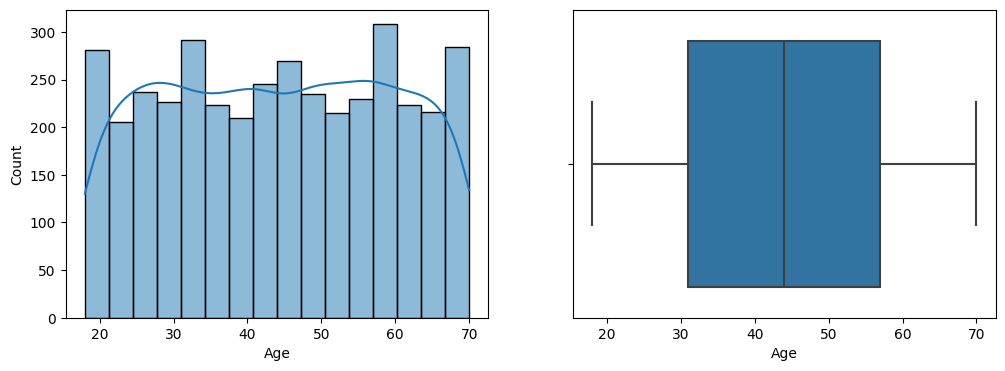

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(data=df, x="Age", kde=True, ax=axes[0])
sns.boxplot(data=df, x="Age")

# GENDER

In [16]:
gender_counts = df["Gender"].value_counts()
gender_counts

Gender
Male      2652
Female    1248
Name: count, dtype: int64

In [17]:
df['Gender'].value_counts(normalize=True)

Gender
Male      0.68
Female    0.32
Name: proportion, dtype: float64

Text(0.5, 1.0, 'Gender Distribution')

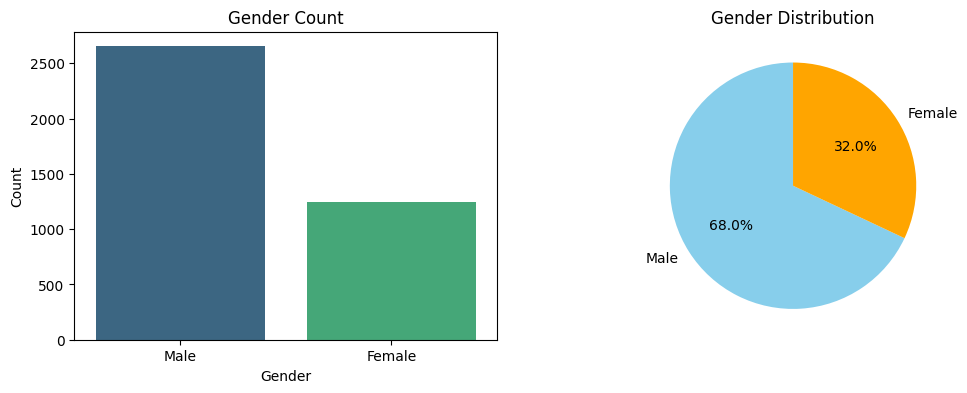

In [19]:
ig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.countplot(data=df, x="Gender", ax=axes[0], palette="viridis")
axes[0].set_title('Gender Count')
axes[0].set_xlabel('Gender')
axes[0].set_ylabel('Count')

# Pie chart
axes[1].pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=['skyblue', 'orange'], startangle=90)
axes[1].set_title('Gender Distribution')

# ITEMS PURCHASED

In [20]:
items_purchased_counts = df["Item Purchased"].value_counts()
items_purchased_counts

Item Purchased
Blouse        171
Jewelry       171
Pants         171
Shirt         169
Dress         166
Sweater       164
Jacket        163
Belt          161
Sunglasses    161
Coat          161
Sandals       160
Socks         159
Skirt         158
Shorts        157
Scarf         157
Hat           154
Handbag       153
Hoodie        151
Shoes         150
T-shirt       147
Sneakers      145
Boots         144
Backpack      143
Gloves        140
Jeans         124
Name: count, dtype: int64

In [21]:
df["Item Purchased"].value_counts(normalize=True).reset_index()

,Item Purchased,proportion
0,Blouse,0.043846
1,Jewelry,0.043846
2,Pants,0.043846
3,Shirt,0.043333
4,Dress,0.042564
5,Sweater,0.042051
6,Jacket,0.041795
7,Belt,0.041282
8,Sunglasses,0.041282
9,Coat,0.041282


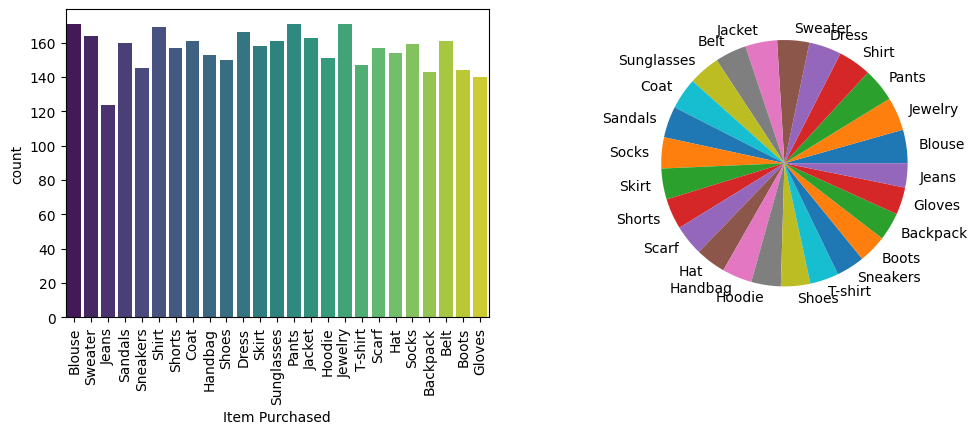

In [22]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.countplot(data=df, x="Item Purchased",ax=axes[0], palette="viridis")
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)

axes[1].pie(items_purchased_counts, labels=items_purchased_counts.index)

plt.show()

# CATEGORY

In [23]:
category_count = df["Category"].value_counts()
category_count

Category
Clothing       1737
Accessories    1240
Footwear        599
Outerwear       324
Name: count, dtype: int64

In [24]:
df["Category"].value_counts(normalize=True)

Category
Clothing       0.445385
Accessories    0.317949
Footwear       0.153590
Outerwear      0.083077
Name: proportion, dtype: float64

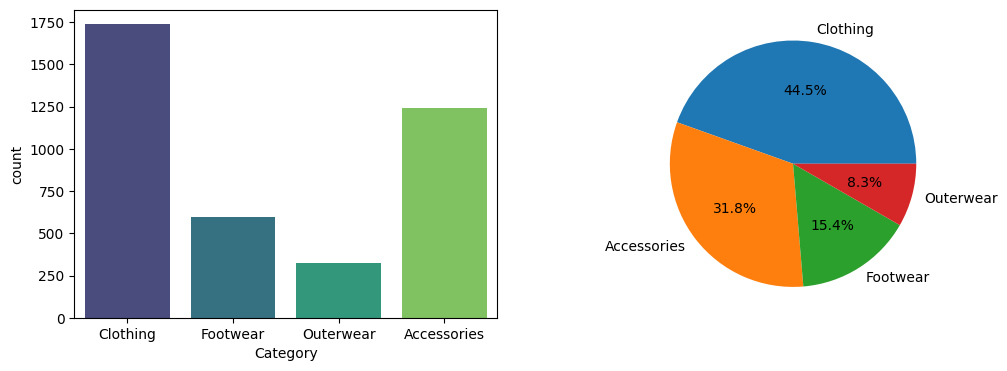

In [25]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.countplot(data=df, x="Category", ax=axes[0], palette="viridis")
axes[1].pie(category_count, labels=category_count.index, autopct="%0.1f%%")

plt.show()

In [26]:
df["Purchase Amount (USD)"].describe()

count    3900.000000
mean       59.764359
std        23.685392
min        20.000000
25%        39.000000
50%        60.000000
75%        81.000000
max       100.000000
Name: Purchase Amount (USD), dtype: float64

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Purchase Amount (USD)'>

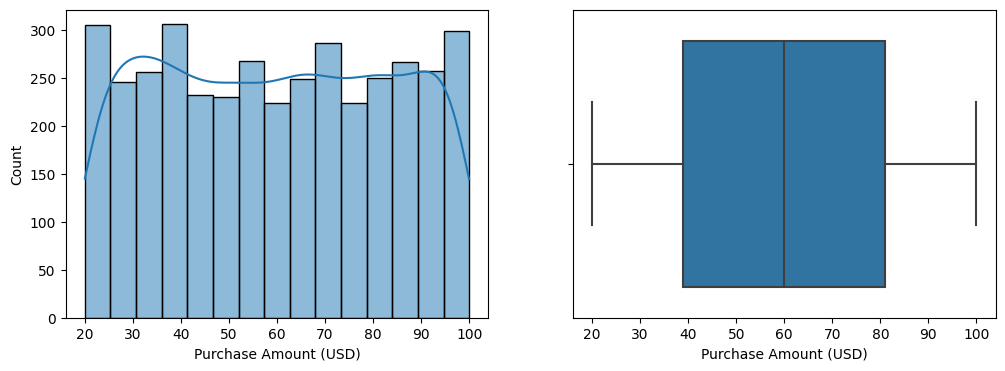

In [27]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(data=df, x="Purchase Amount (USD)", kde=True, ax=axes[0])
sns.boxplot(data=df, x="Purchase Amount (USD)", ax=axes[1])

# LOCATION

In [28]:
location_counts = df["Location"].value_counts()
location_counts

Location
Montana           96
California        95
Idaho             93
Illinois          92
Alabama           89
Minnesota         88
Nebraska          87
New York          87
Nevada            87
Maryland          86
Delaware          86
Vermont           85
Louisiana         84
North Dakota      83
Missouri          81
West Virginia     81
New Mexico        81
Mississippi       80
Indiana           79
Georgia           79
Kentucky          79
Arkansas          79
North Carolina    78
Connecticut       78
Virginia          77
Ohio              77
Tennessee         77
Texas             77
Maine             77
South Carolina    76
Colorado          75
Oklahoma          75
Wisconsin         75
Oregon            74
Pennsylvania      74
Washington        73
Michigan          73
Alaska            72
Massachusetts     72
Wyoming           71
Utah              71
New Hampshire     71
South Dakota      70
Iowa              69
Florida           68
New Jersey        67
Hawaii            65
Ariz

In [29]:
df["Location"].value_counts(normalize=True).reset_index()

,Location,proportion
0,Montana,0.024615
1,California,0.024359
2,Idaho,0.023846
3,Illinois,0.023590
4,Alabama,0.022821
5,Minnesota,0.022564
6,Nebraska,0.022308
7,New York,0.022308
8,Nevada,0.022308
9,Maryland,0.022051


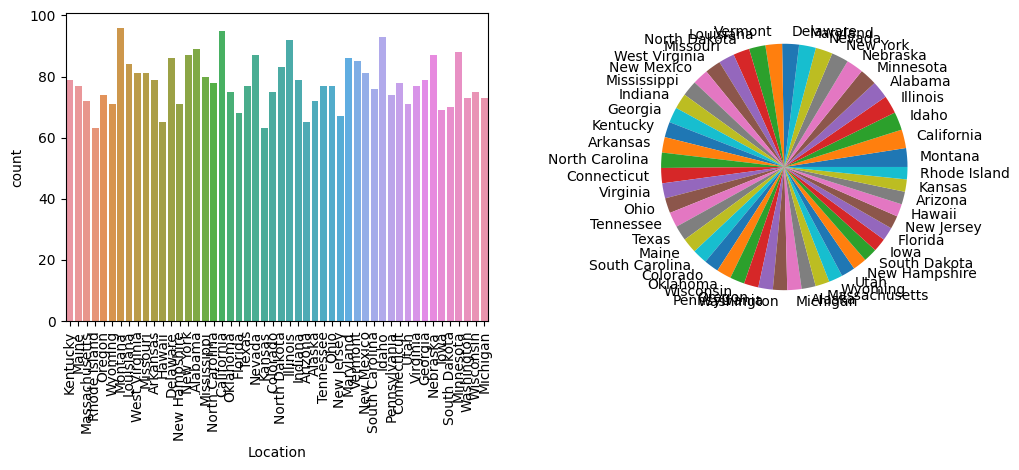

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.countplot(data=df, x="Location", ax=axes[0])
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)

axes[1].pie(location_counts, labels=location_counts.index)

plt.show()

# SIZE

In [31]:
size_counts = df["Size"].value_counts()
size_counts

Size
M     1755
L     1053
S      663
XL     429
Name: count, dtype: int64

In [32]:
df["Size"].value_counts(normalize=True).reset_index()

,Size,proportion
0,M,0.45
1,L,0.27
2,S,0.17
3,XL,0.11


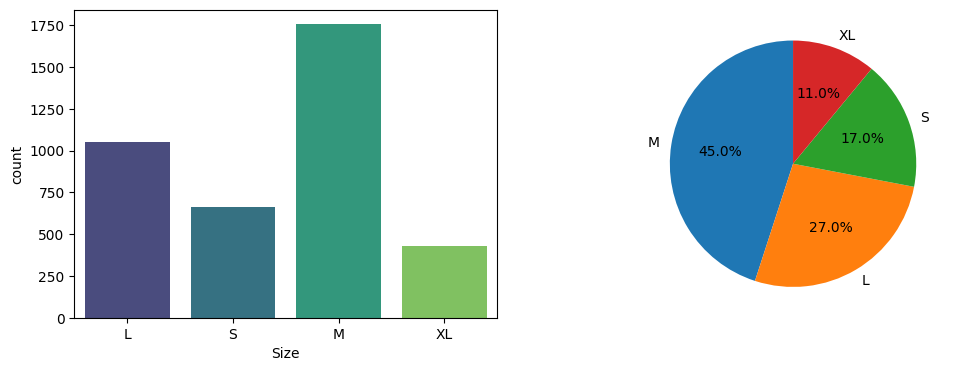

In [33]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.countplot(data=df, x="Size", ax=axes[0], palette="viridis")
axes[1].pie(size_counts, labels=size_counts.index, autopct="%.1f%%", startangle=90)

plt.show()

In [34]:
df.sample()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
1020,1021,24,Male,Scarf,Accessories,95,Delaware,M,Black,Fall,4.5,Yes,Bank Transfer,Express,Yes,Yes,41,Debit Card,Annually


# COLOR

In [35]:
color_counts = df["Color"].value_counts()
color_counts

Color
Olive        177
Yellow       174
Silver       173
Teal         172
Green        169
Black        167
Cyan         166
Violet       166
Gray         159
Maroon       158
Orange       154
Charcoal     153
Pink         153
Magenta      152
Blue         152
Purple       151
Peach        149
Red          148
Beige        147
Indigo       147
Lavender     147
Turquoise    145
White        142
Brown        141
Gold         138
Name: count, dtype: int64

In [36]:
df["Color"].value_counts(normalize=True).reset_index()

,Color,proportion
0,Olive,0.045385
1,Yellow,0.044615
2,Silver,0.044359
3,Teal,0.044103
4,Green,0.043333
5,Black,0.042821
6,Cyan,0.042564
7,Violet,0.042564
8,Gray,0.040769
9,Maroon,0.040513


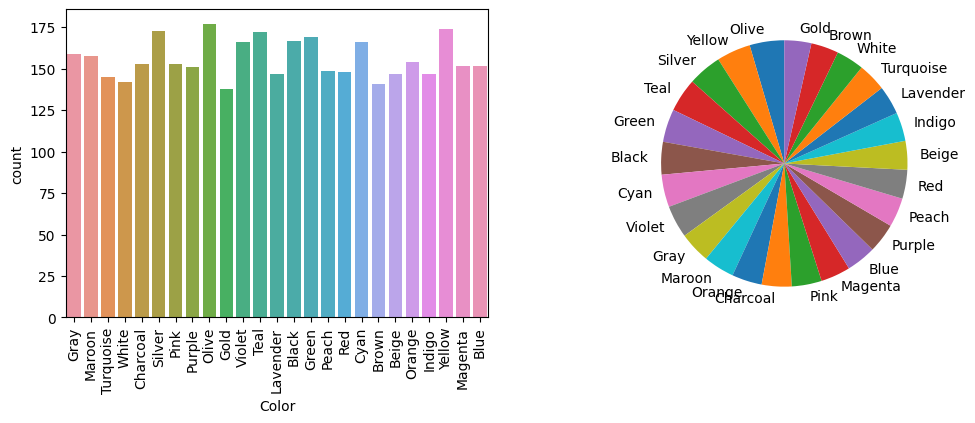

In [37]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.countplot(data=df, x="Color", ax=axes[0])
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)

axes[1].pie(color_counts, labels=color_counts.index, startangle=90)

plt.show()

In [38]:
df.sample()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
1433,1434,70,Male,Hoodie,Clothing,60,Minnesota,L,Yellow,Winter,3.2,No,Venmo,Next Day Air,Yes,Yes,45,Debit Card,Weekly


# SEASON


In [39]:
season_counts = df["Season"].value_counts()
season_counts

Season
Spring    999
Fall      975
Winter    971
Summer    955
Name: count, dtype: int64

In [40]:
df["Season"].value_counts(normalize=1).reset_index()

,Season,proportion
0,Spring,0.256154
1,Fall,0.250000
2,Winter,0.248974
3,Summer,0.244872


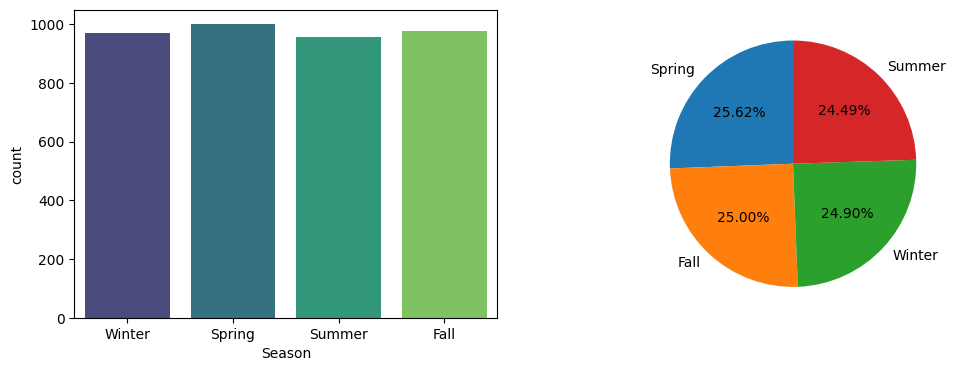

In [41]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.countplot(data=df, x="Season", ax=axes[0], palette="viridis")
axes[1].pie(season_counts, labels=season_counts.index, autopct="%1.2f%%", startangle=90)

plt.show()

In [42]:
df.sample()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
1772,1773,58,Male,Shoes,Footwear,34,Hawaii,M,Gold,Summer,3.1,No,PayPal,2-Day Shipping,No,No,1,Bank Transfer,Annually


In [43]:
df["Review Rating"].describe()

count    3900.000000
mean        3.749949
std         0.716223
min         2.500000
25%         3.100000
50%         3.700000
75%         4.400000
max         5.000000
Name: Review Rating, dtype: float64

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Review Rating'>

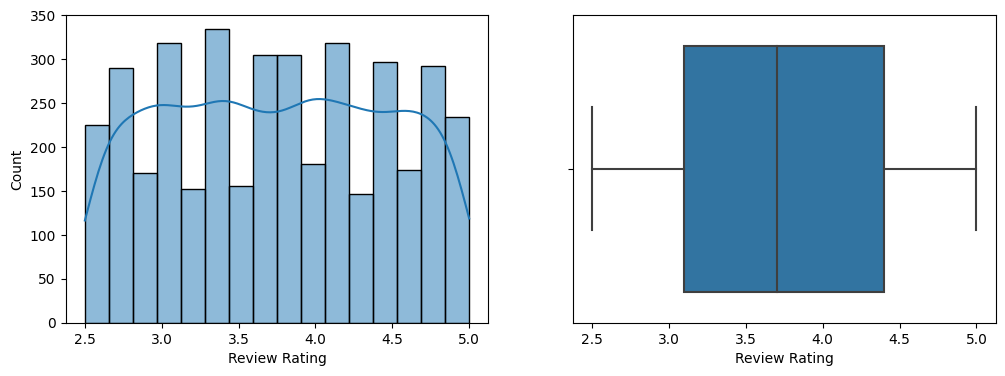

In [44]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(data=df, x="Review Rating", ax=axes[0], kde=True)
sns.boxplot(data=df, x="Review Rating", ax=axes[1])

SUBSCRIPTION

In [47]:
subscription_status_count = df["Subscription Status"].value_counts()
subscription_status_count

Subscription Status
No     2847
Yes    1053
Name: count, dtype: int64

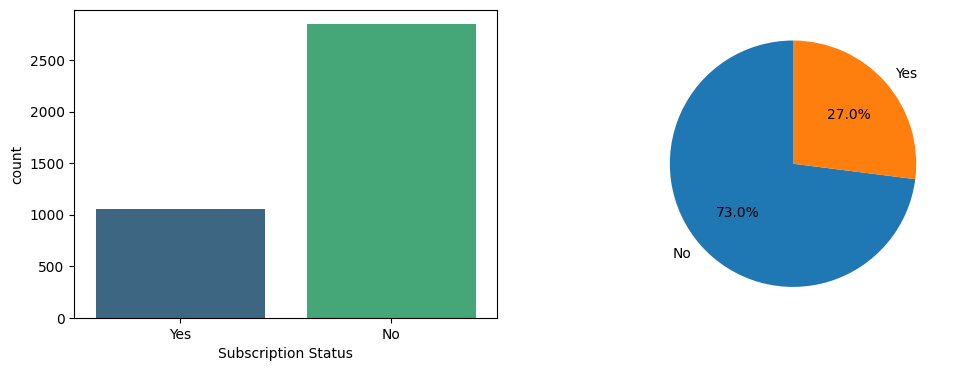

In [46]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.countplot(data=df, x="Subscription Status", ax=axes[0], palette="viridis")
axes[1].pie(subscription_status_count, labels=subscription_status_count.index, autopct="%1.1f%%", startangle=90)

plt.show()